# Fármacos

Essa base de dados apresenta vendas de remédios no ano de 2015. Ela mostra para quais doenças os medicamentos atingem, as empresas fabricantes, os países de destino, os valores e as quantidades.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Business dataset.xlsx')

In [3]:
df.head()

,Order ID,Generic Name,Brand Name,Company Name,Disease Medical Use,Invoice date,Company code,ship to country,Sold-to party Country Full Name,Delivery Plant,External Agent,Sales quantity,Price TC /Kg,Revenue,External commissions,Months
0,FY-2015-001,Aripiprazole,Abilify,Generic,Psychosis; depression,2015-11-09,5704,Mexico,Mexico,8370,Not assigned,450,204,91800,0.0,Nov
1,IN-2015-002,Oxycodone,OxyContin,Generic,Pain,2015-06-30,5704,Thailand,Thailand,8370,Not assigned,374,472,176528,0.0,Jun
2,IN-2015-003,Oxycodone,OxyContin,Generic,Pain,2015-12-05,5704,Vietnam,Japan,8370,Assigned,138,472,65136,4186.0,Dec
3,IN-2015-004,Oxycodone,OxyContin,Generic,Pain,2015-05-09,5704,Australia,Australia,8370,Not assigned,227,472,107144,0.0,May
4,IN-2015-005,Oxycodone,OxyContin,Generic,Pain,2015-07-09,5704,Singapore,Singapore,8370,Not assigned,394,472,185968,0.0,Jul


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 16 columns):
Order ID                           3326 non-null object
Generic Name                       3326 non-null object
Brand Name                         3326 non-null object
Company Name                       3326 non-null object
Disease Medical Use                3326 non-null object
Invoice date                       3326 non-null datetime64[ns]
Company code                       3326 non-null int64
ship to country                    3326 non-null object
Sold-to party Country Full Name    3326 non-null object
Delivery Plant                     3326 non-null int64
External Agent                     3326 non-null object
Sales quantity                     3326 non-null int64
Price TC /Kg                       3326 non-null int64
Revenue                            3326 non-null int64
External commissions               3326 non-null float64
Months                             3326 non-null 

In [38]:
df.shape
# são 3326 linhas e 16 colunas

(3326, 7)

In [6]:
df.describe()

,Company code,Delivery Plant,Sales quantity,Price TC /Kg,Revenue,External commissions
count,3326.000000,3326.000000,3326.000000,3326.000000,3326.00000,3326.000000
mean,5790.534877,8139.996091,255.105532,404.814191,103171.70926,1689.373221
std,97.658222,148.833525,143.289185,105.390681,65287.19903,3133.869579
min,5566.000000,7904.000000,1.000000,204.000000,243.00000,0.000000
25%,5704.000000,8095.000000,129.000000,314.000000,49541.25000,0.000000
50%,5779.000000,8095.000000,260.000000,451.000000,97094.00000,0.000000
75%,5887.000000,8209.000000,378.000000,500.000000,148962.00000,2110.083333
max,5938.000000,8370.000000,500.000000,500.000000,250000.00000,16236.000000


### Análise exploratória

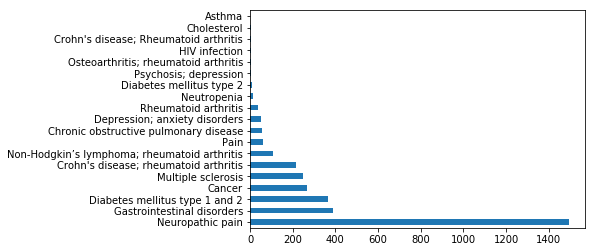

In [7]:
df['Disease Medical Use'].value_counts().plot(kind='barh')

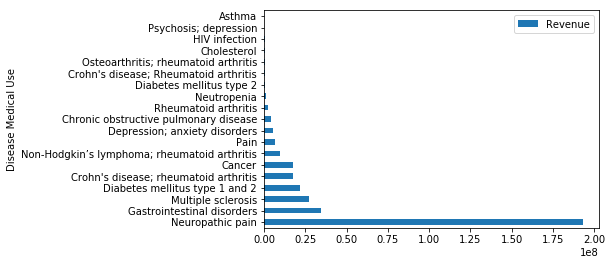

In [8]:
df.groupby('Disease Medical Use').Revenue.sum().reset_index().sort_values('Revenue', ascending=False).set_index('Disease Medical Use').plot(kind='barh')

Na primeira figura vemos um número muito maior de lotes de fármacos vendidos para Dor Neuropática. Na segunda figura nota-se que esse tipo de fármaco tem o maior revenue.  A base de dados não diz qual a moeda usada. O revenue é a multiplicação do Sales Quantity com Price TC/kg (preço total por quilograma). O revenue e quantidade de lotes tem uma correlação forte.

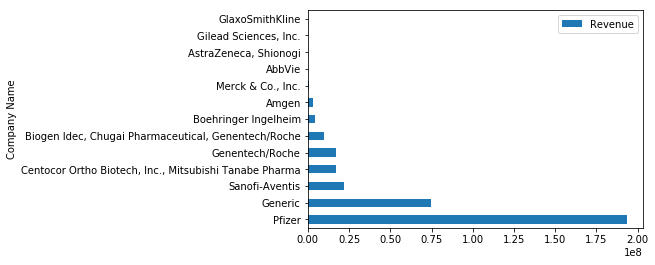

In [9]:
df.groupby('Company Name').Revenue.sum().reset_index().sort_values('Revenue', ascending=False).set_index('Company Name').plot(kind='barh')

A soma de revenue mostra que a Pfizer lidera, seguida por genéricos e Sanofi-Aventis.

In [10]:
df.groupby('Company Name')['Revenue'].mean().reset_index().sort_values('Revenue', ascending=False)

,Company Name,Revenue
2,"AstraZeneca, Shionogi",168911.500000
11,Pfizer,129294.648829
0,AbbVie,123197.000000
7,Generic,98143.069829
10,"Merck & Co., Inc.",93853.142857
3,"Biogen Idec, Chugai Pharmaceutical, Genentech/...",91456.716981
5,"Centocor Ortho Biotech, Inc., Mitsubishi Tanab...",80129.327189
4,Boehringer Ingelheim,79549.444444
8,"Gilead Sciences, Inc.",66779.250000
6,Genentech/Roche,65607.249057


Já quando tomamos o revenue médio a AstraZeneca - Shionogi lidera seguida pela Pfizer e pela AbbVie. A Sanofi-Aventis cai para penúltima posição. 

In [11]:
df.groupby('Company Name')['Price TC /Kg'].mean().reset_index().sort_values('Price TC /Kg', ascending=False)

,Company Name,Price TC /Kg
11,Pfizer,500.000000
2,"AstraZeneca, Shionogi",499.000000
7,Generic,406.262187
10,"Merck & Co., Inc.",386.000000
3,"Biogen Idec, Chugai Pharmaceutical, Genentech/...",364.000000
9,GlaxoSmithKline,353.000000
0,AbbVie,349.000000
5,"Centocor Ortho Biotech, Inc., Mitsubishi Tanab...",314.000000
4,Boehringer Ingelheim,310.000000
8,"Gilead Sciences, Inc.",269.000000


In [12]:
df.groupby('Company Name')['Sales quantity'].sum().reset_index().sort_values('Sales quantity', ascending=False)

,Company Name,Sales quantity
11,Pfizer,386591
7,Generic,183242
12,Sanofi-Aventis,94462
6,Genentech/Roche,71547
5,"Centocor Ortho Biotech, Inc., Mitsubishi Tanab...",55376
3,"Biogen Idec, Chugai Pharmaceutical, Genentech/...",26633
4,Boehringer Ingelheim,13857
1,Amgen,12341
10,"Merck & Co., Inc.",1702
0,AbbVie,1059


A Sanofi-Aventis tem o preço total médio mais baixo e é a terceira empresa com maior quantidade de produto vendidos.

In [13]:
df.groupby('ship to country').Revenue.sum().reset_index().sort_values('Revenue', ascending=False).set_index('ship to country')

,Revenue
ship to country,
India,193340264
Thailand,27003115
Vietnam,13522609
Egypt,13278208
Indonesia,11510346
Nepal,7842394
Malaysia,7805616
Netherlands,5767851
Pakistan,5594622


In [14]:
193340264 / 27003115, 193340264 / 120930

(7.15992447537997, 1598.7783345737203)

O país que rendeu o maior montante de revenue foi a Índia. Ele foi mais de sete vezes maior que o revenue do segundo colocado, Tailândia. A China teve um revenue 1598 vezes menor que a Índia.

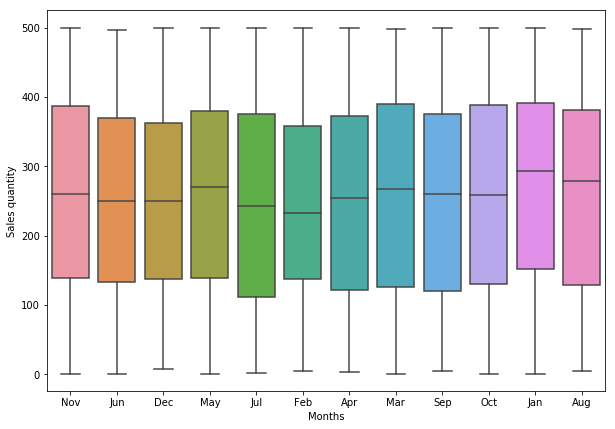

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Months', y='Sales quantity', data=df)

Não se nota a presença de outliers nos gráficos boxplot. (meses x quantidade de vendas)

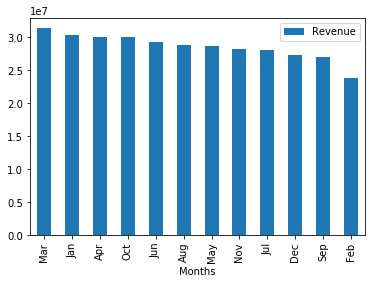

In [16]:
df.groupby('Months').Revenue.sum().reset_index().sort_values('Revenue', ascending=False).set_index('Months').plot(kind='bar')

Não há uma regra na distribuição de revenue ao longo dos meses. 

In [17]:
df[df['ship to country'] == 'Netherlands'].groupby('Months').Revenue.sum().reset_index().sort_values('Revenue', ascending=False)

,Months,Revenue
7,Mar,729230
8,May,642164
11,Sep,616350
10,Oct,602418
9,Nov,566829
1,Aug,526569
2,Dec,384251
5,Jul,376205
0,Apr,369612
6,Jun,355619


Num país com clima bem marcado como a Alemanha também não percebemos uma correlação ao longo dos meses. 

# Previsão

In [18]:
df.columns

Index(['Order ID', 'Generic Name', 'Brand Name', 'Company Name',
       'Disease Medical Use', 'Invoice date', 'Company code',
       'ship to country', 'Sold-to party Country Full Name', 'Delivery Plant',
       'External Agent', 'Sales quantity', 'Price TC /Kg', 'Revenue',
       'External commissions', 'Months'],
      dtype='object')

In [19]:
df.drop(columns=['Order ID', 'Generic Name', 'Brand Name', 'Invoice date', 'Company code',
                'Sold-to party Country Full Name', 'Delivery Plant', 'Price TC /Kg', 'Months'], inplace=True)

In [20]:
df.head()

,Company Name,Disease Medical Use,ship to country,External Agent,Sales quantity,Revenue,External commissions
0,Generic,Psychosis; depression,Mexico,Not assigned,450,91800,0.0
1,Generic,Pain,Thailand,Not assigned,374,176528,0.0
2,Generic,Pain,Vietnam,Assigned,138,65136,4186.0
3,Generic,Pain,Australia,Not assigned,227,107144,0.0
4,Generic,Pain,Singapore,Not assigned,394,185968,0.0


In [21]:
df1 = pd.get_dummies(df, drop_first=True)

In [22]:
df1.shape

(3326, 92)

In [23]:
from sklearn.model_selection import train_test_split

Para fazer uma regressão e prever os revenues podemos dividir a base de dados com 75% dela para treino e 25% pare teste. Com ¾ de treino fazemos um modelo que será validado no ¼ e assim é calculado o R2 desse modelo. 

In [24]:
X = df1.drop(columns=['Revenue'])
y = df1.Revenue
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2494, 91), (832, 91), (2494,), (832,))

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
predictions = model.predict(X_test)

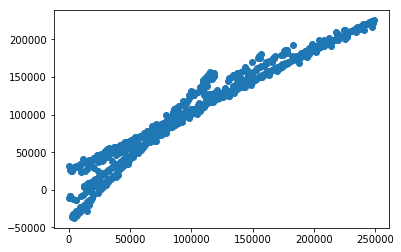

In [30]:
plt.scatter(y_test, predictions)

In [32]:
from sklearn.metrics import r2_score

In [33]:
score = r2_score(y_test, predictions)
print(score)

0.9456891019888198


Quando comparadas as predições com os dados de teste temos uma R2 de 94,5%. Isso mostra que 94,5% dos dados de teste são explicados pelos dados previstos usando os dados de treino.

In [36]:
print(model.coef_)

[ 4.03935839e+02 -4.32761430e-01 -1.77800532e+04  2.89822820e+04
  1.86816271e+03 -4.95361148e+03 -4.64607892e+03 -1.42267985e+04
  8.32274397e+03 -4.11157093e+03  4.61113814e-09  4.32014203e+03
  1.92579446e+04 -1.60430991e+04 -1.42267985e+04  2.89822820e+04
 -4.95361148e+03 -9.90063229e+02 -4.64607892e+03  1.66519638e+04
 -1.60430991e+04  4.32014203e+03 -4.14252289e+03 -4.11157093e+03
  1.75312290e+04  1.92579446e+04 -1.40433557e+04  1.86816271e+03
 -2.41629636e+04  2.28193420e+04 -2.03743043e+04 -3.73669745e+03
  7.09400196e+03 -1.93538657e+03  1.05076695e+04 -9.54307192e+03
  8.82134391e+02  2.13098895e+03  5.09704149e+03  9.45234665e+03
  4.28674985e+03  8.20112909e+03  7.62265981e+03  1.64258406e+04
 -5.45065842e+02  8.48096782e+03  1.07664992e+04  6.79003095e+03
  5.68097657e+03  1.15235884e+04  3.21358663e+03  2.79005221e+03
  1.59330525e+03  3.15986677e+03  1.60784122e+04  4.30197445e+03
  7.86306218e+03 -8.17942736e+03  1.32613062e+04  4.71969993e+03
  1.93676510e+03  1.00953

In [37]:
print(model.intercept_)

-18070.95839998046


Analisando os dados é possível ter uma boa ideia de como o mercado de fármacos se comportou. A regressão nos dá segurança para prever qual seria o revenue com base nas demais características.